## Ekploracyjna analiza danych dotyczących studentów (uczniów) szkół średnich
#### W szczególności, wpływ poszczególnych czynników na ocenę końcową

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder

plt.rcParams['figure.figsize'] = (16,6)
plt.rcParams['font.size'] = 16
sns.set_context('paper', font_scale=1.4)
sns.set_style("ticks",{'axes.grid' : True})
warnings.simplefilter(action='ignore', category=FutureWarning)

### Wczytanie danych

In [4]:
df = pd.read_csv('students.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,class
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,math
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,4,5,5,6,math
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,10,7,8,10,math
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,2,15,14,15,math
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,4,6,10,10,math


In [5]:
df.shape

(1044, 34)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [6]:
df.drop_duplicates().shape

(1044, 34)

#### Podsumowanie

34 kolumny, 1044 wiersze; nie ma braków danych ani duplikatów

### Analiza typów zmiennych

Zbiór danych zawiera 34 zmienne. Opisane są one [tutaj](https://www.kaggle.com/uciml/student-alcohol-consumption).

Ogólnie, zmienne możemy podzielić na:
* binarne: `school`, `sex`, `address`, `famsize`, `Pstatus`, `schoolsup`, `famsup`, `paid`, `activities`, `nursery`, `higher`, `internet`, `romantic`, `class`;
* nomianalne: `Mjob`, `Fjob`, `reason`, `guardian`;
* uporządkowane: `Medu`, `Fedu`, `traveltime`, `studytime`, `failures`, `famrel`, `freetime`, `goout`, `Dalc`, `Walc`, `health`
* ilościowe: `age`, `absences`, `G1`, `G2`, `G3`

In [11]:
df[['age', 'absences', 'G1', 'G2', 'G3']].describe()

,age,absences,G1,G2,G3
count,1044.000000,1044.000000,1044.000000,1044.000000,1044.000000
mean,16.726054,4.434866,11.213602,11.246169,11.341954
std,1.239975,6.210017,2.983394,3.285071,3.864796
min,15.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,0.000000,9.000000,9.000000,10.000000
50%,17.000000,2.000000,11.000000,11.000000,11.000000
75%,18.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,19.000000,19.000000,20.000000


### Rozkłady zmiennych, wartości odstające

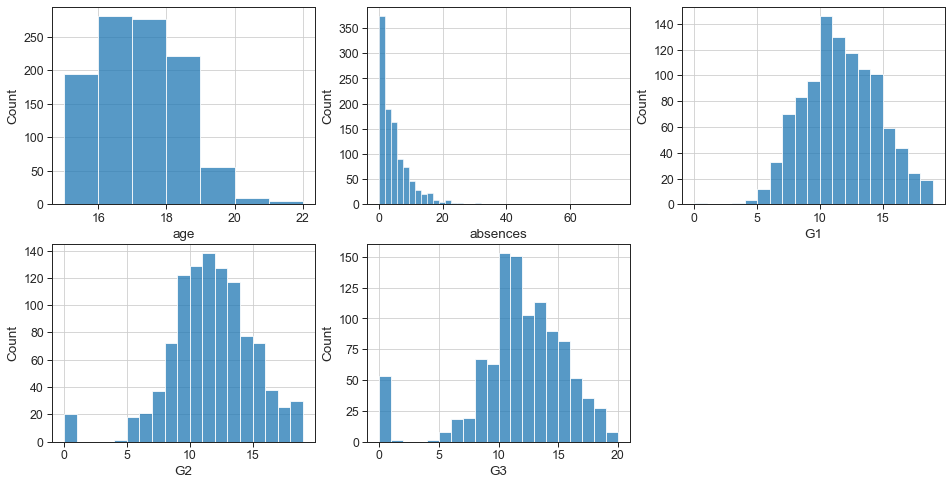

In [43]:
fig, axs = plt.subplots(2, 3, figsize=(16, 8))

sns.histplot(df, x='age', binwidth=1, ax=axs[0,0]);
sns.histplot(df, x='absences', bins=40, ax=axs[0,1]);
sns.histplot(df, x='G1', binwidth=1, ax=axs[0,2]);
sns.histplot(df, x='G2', binwidth=1, ax=axs[1,0]);
sns.histplot(df, x='G3', binwidth=1, ax=axs[1,1]);
axs[1,2].set_visible(False)

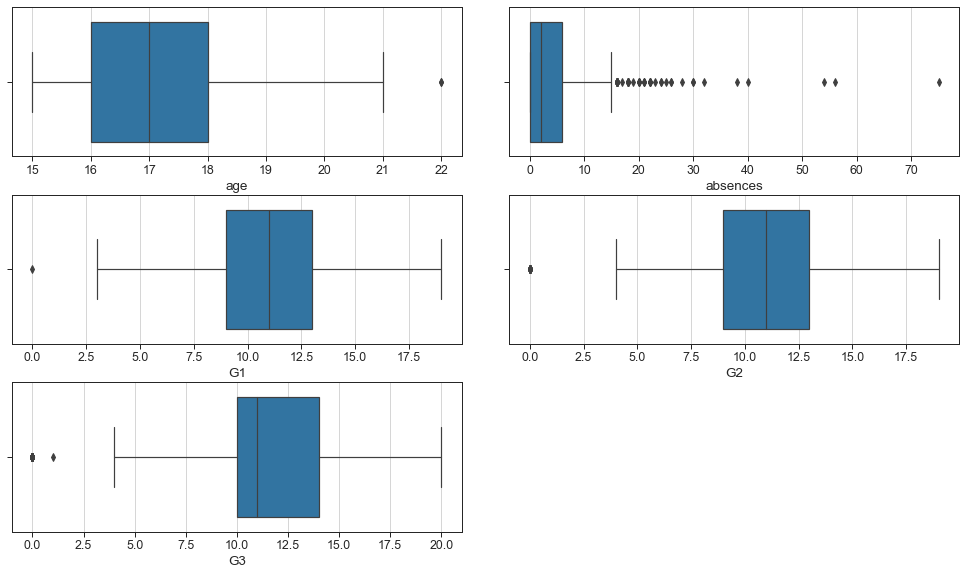

In [91]:
fig, axs = plt.subplots(3, 2, figsize=(14, 8))
fig.tight_layout(pad=1.0)

for i, col in enumerate(df[['age', 'absences', 'G1', 'G2', 'G3']].columns):
    sns.boxplot(data=df, x = col, ax=axs[i//2][i%2])
axs[2,1].set_visible(False)

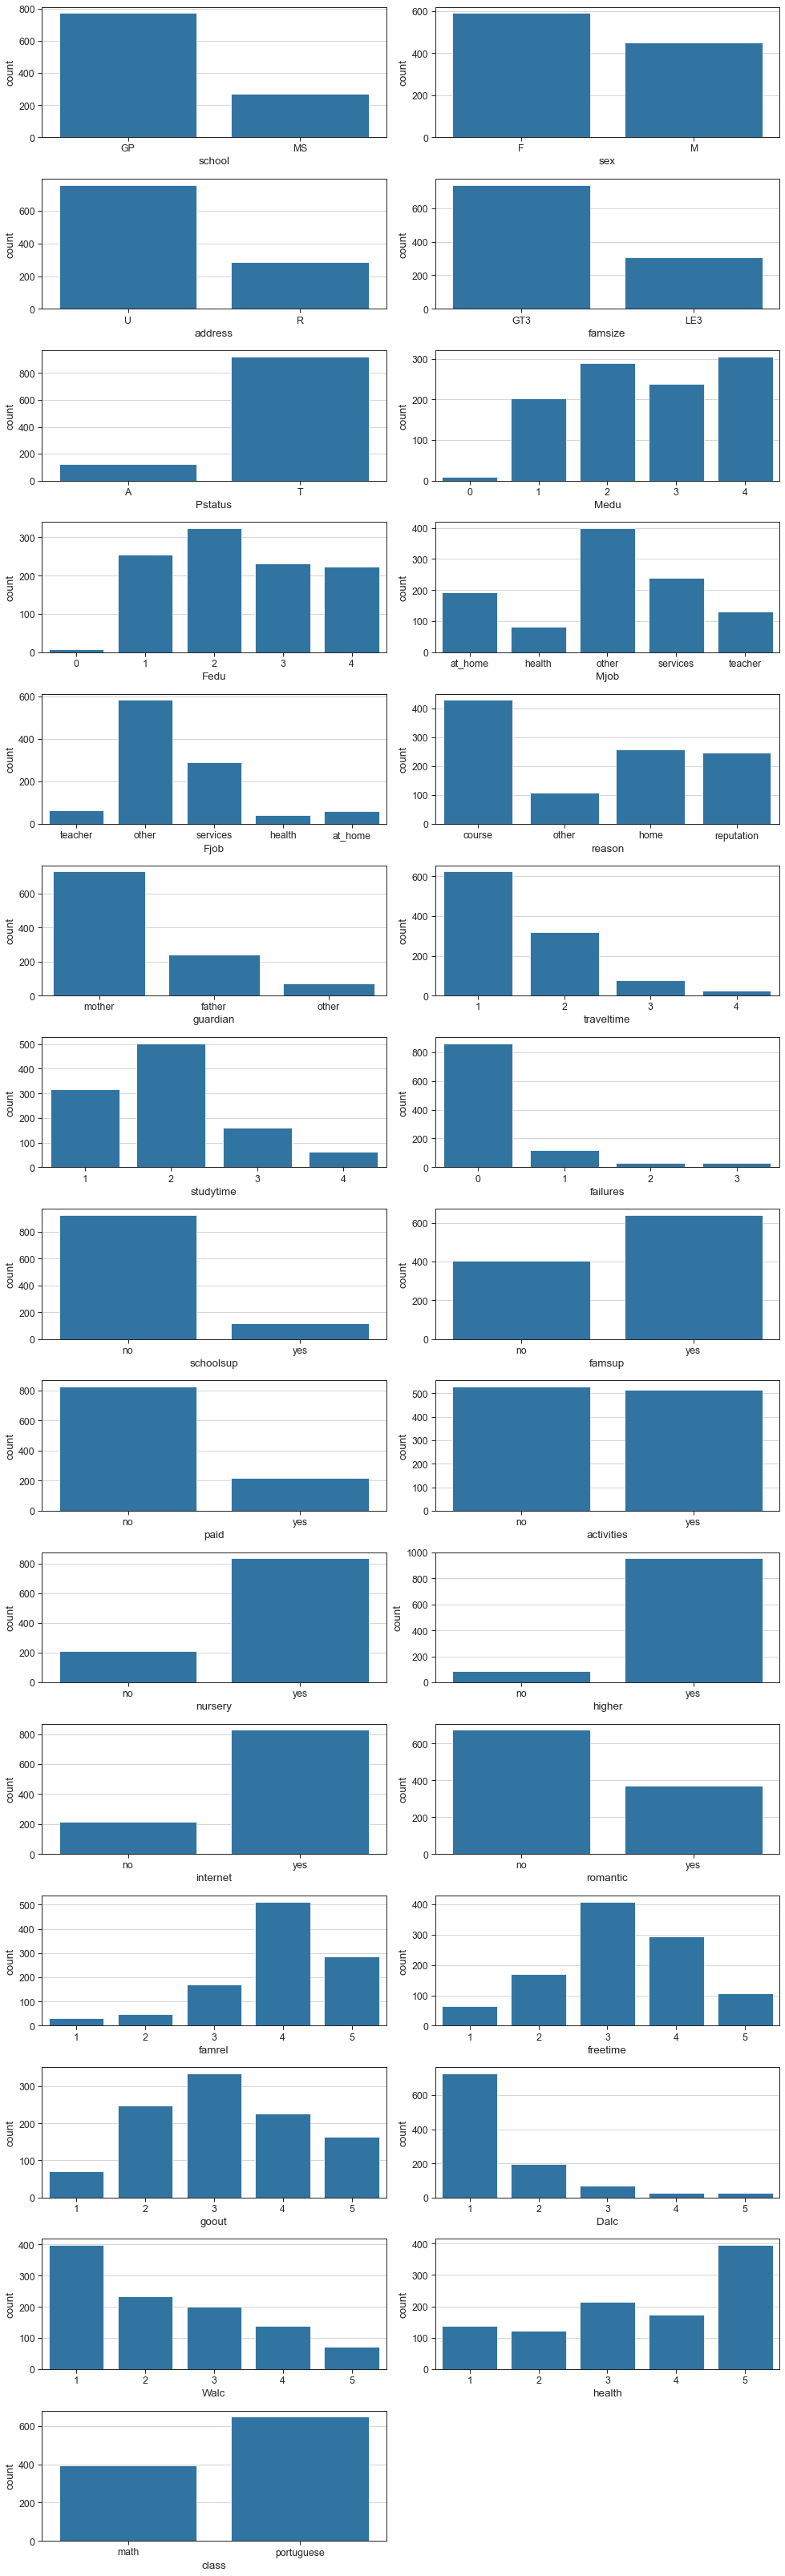

In [6]:
fig, axs = plt.subplots(15, 2, figsize=(14, 45))
fig.tight_layout(pad=2.0)

for i, col in enumerate(df.drop(['age', 'absences', 'G1', 'G2', 'G3'], axis=1).columns):
    order = ['no', 'yes'] if 'no' in df[col].unique() else None
    sns.countplot(data=df, x=col, ax=axs[i//2][i%2], order=order, color="#1f77b4")
    
axs[14,1].set_visible(False)

#### Wnioski
* rozkład nieobecności (`absences`) jest bardzo mocno skośny, część wartości można uznać za odstające
* rozkłady ocen (`G1`, `G2`, `G3`) są przypominają rozkład normalny; sporo wartości odstających równych 0
* można rozważyć uproszczenie niektórych zmiennych jakościowych; istnieją kategorie takie jak `4` i `5` w dziennym spożyciu alkoholu czy też kategoria `0` (brak edukacji) w `Fedu` i `Medu`, które są bardzo rzadkie

### Korelacje pomiędzy zmiennymi

Szukamy korelacji między zmiennymi. W tym celu część zmiennych transformujemy na numeryczne i usuwamy te zmienne kategoryczne, których wartości nie da się uporządkować (`Fjob`, `Mjob`, `reason`, `guardian` - zmienne nominalne).

<AxesSubplot:>

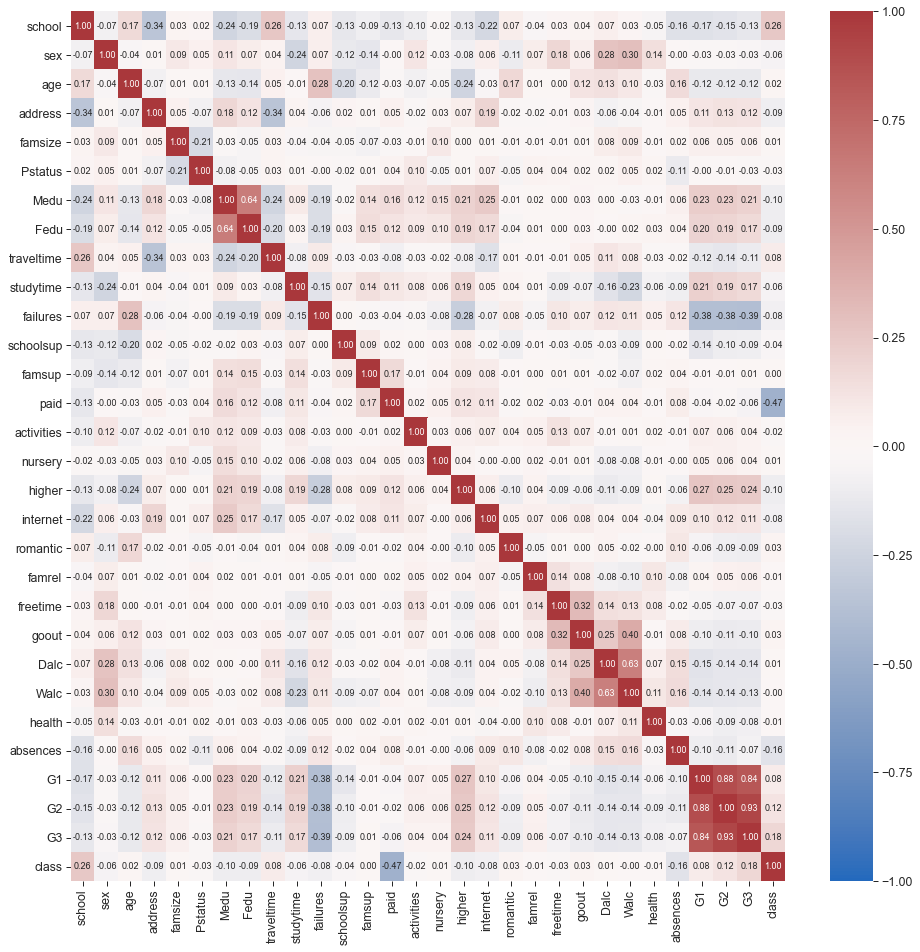

In [13]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_numeric = df.apply(label_encoder.fit_transform).drop(columns = ['Fjob', 'Mjob', 'reason', 'guardian'])

plt.figure(figsize = (16,16))
sns.heatmap(df_numeric.corr(), annot=True, cmap='vlag', vmin=-1, vmax=1, center=0, fmt=".2f", annot_kws={"size": 9})

#### Wnioski
* bardzo silna zależność pomiędzy ocenami za poszczególne etapy (`G1`, `G2`, `G3`)
* silna zależność pomiędzy edukacją rodziców (`Fedu`, `Medu`)
* silna zależność pomiędzy spożyciem alkoholu w ciągu tygodnia i w weekendy (`Dalc`, `Walc`)
* ujemna zależność między dodatkowymi płatnymi lekacjami a głównym przedmiotem (`paid`, `class`) - do zbadania
* zależność pomiędzy spożyciem alkoholu a płcią (`Dalc` lub `Walc` a `sex`) - do zbadania
* zależności pomiędzy ocenami a edukacją rodziców, czasem poświęconym na naukę, planowaniem wyższej edukacji, liczbą powtarzanych lat

#### Zależność pomiędzy `paid` a `class`
Jak można było się spodziewać, to studenci z matematyką jako głównym przedmiotem częściej pobierają dodatkowe płatne lekcje.

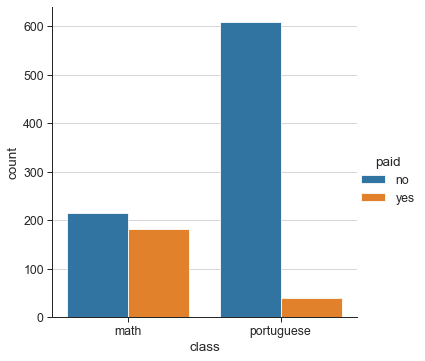

In [114]:
sns.catplot(data=df, x='class', kind='count', hue='paid')

#### Zależność pomiędzy `Walc` a `sex`
Zbliżona liczba studentów płci męskiej konsumuje alkohol w każdej kategorii. U osób płci żeńskiej dostrzegamy wyraźną tendencję spadkową - mała liczba spożywa alkohol w większych ilościach. 

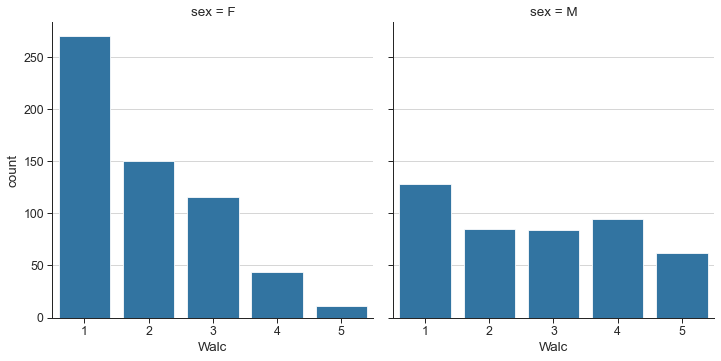

In [112]:
sns.catplot(data=df, x='Walc', kind='count', col='sex', color="#1f77b4")

### Wpływ różnych czynników na ocenę końcową

Przyjrzymy się dokładnie, jak różne aspekty wpływają na oceny. Ponieważ zmienne opisujące oceny `G1`, `G2` oraz `G3` są bardzo mocno ze sobą skorelowane, będziemy badać głównie ocenę końcową `G3`.

Mimo, że korelacje z `G3` na ogół raczej nie były silne, przyjrzymy się jeszcze raz najmocniejszym (>0.15) z nich.

<AxesSubplot:>

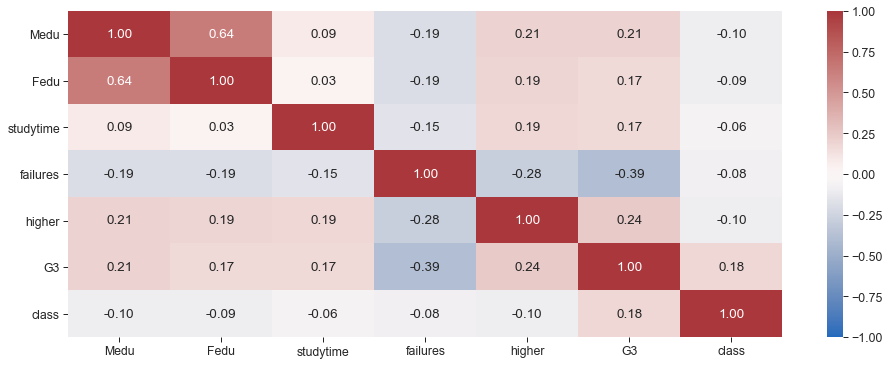

In [14]:
label_encoder = LabelEncoder()
df_numeric = df.apply(label_encoder.fit_transform).drop(columns = ['Fjob', 'Mjob', 'reason', 'guardian', 'G1', 'G2'])
df_corr = df_numeric.corr()

variables = df_corr['G3'].loc[abs(df_corr['G3']) > 0.15].index
df_corr = df_corr.filter(variables, axis=0).filter(variables, axis=1)

sns.heatmap(df_corr, annot=True, cmap="vlag", vmin=-1, vmax=1, center=0, fmt=".2f")

Zbadamy teraz szczegółowo zależności.

#### Zależność od edukacji rodziców

<AxesSubplot:xlabel='Fedu', ylabel='G3'>

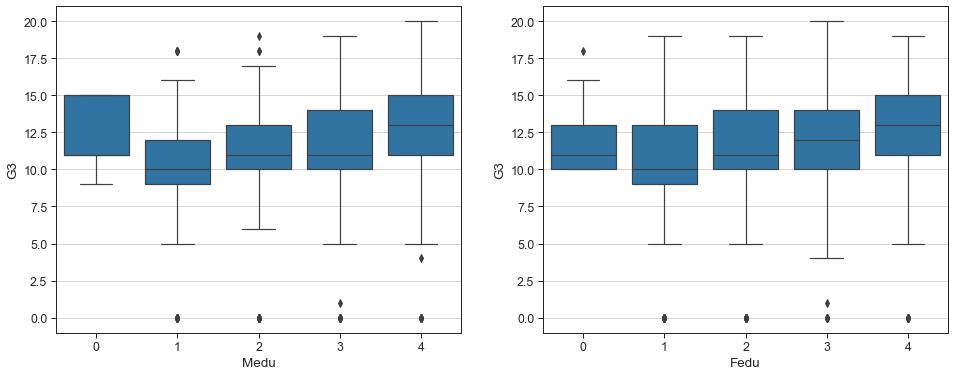

In [193]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.boxplot(data=df, x='Medu', y='G3', color="#1f77b4", ax=axs[0])
sns.boxplot(data=df, x='Fedu', y='G3', color="#1f77b4", ax=axs[1])

In [195]:
df['Medu'].value_counts()

4    306
2    289
3    238
1    202
0      9
Name: Medu, dtype: int64

Im wyższa edukacja rodziców (matki), tym lepsza ocena finalna. Wyjątek stanowi brak edukacji u rodzica, zapewne ze względu na niewielką liczbę takich studentów.

#### Zależność od czasu poświęconego na naukę

<AxesSubplot:xlabel='studytime', ylabel='G3'>

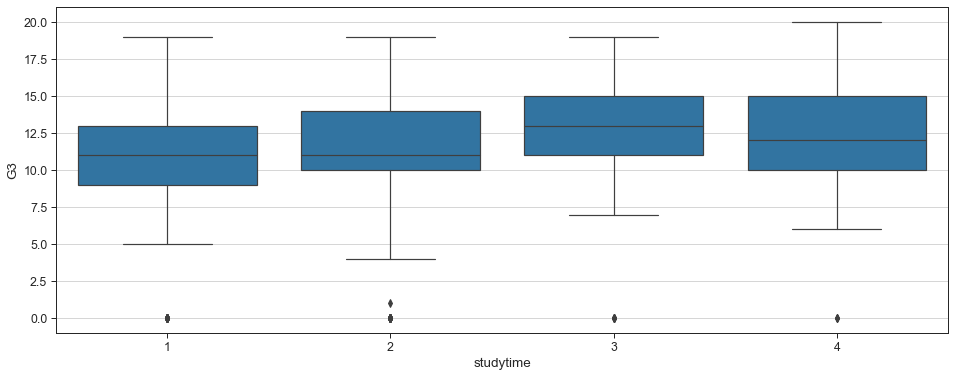

In [159]:
sns.boxplot(data=df, x='studytime', y='G3', color="#1f77b4")

Oczywista zależność, im więcej czasu poświęcanego na naukę, tym odrobinę lepsze oceny. Jednak w każdej grupie są wartości odstające.

#### Zależność od liczby poprawek

<AxesSubplot:xlabel='failures', ylabel='G3'>

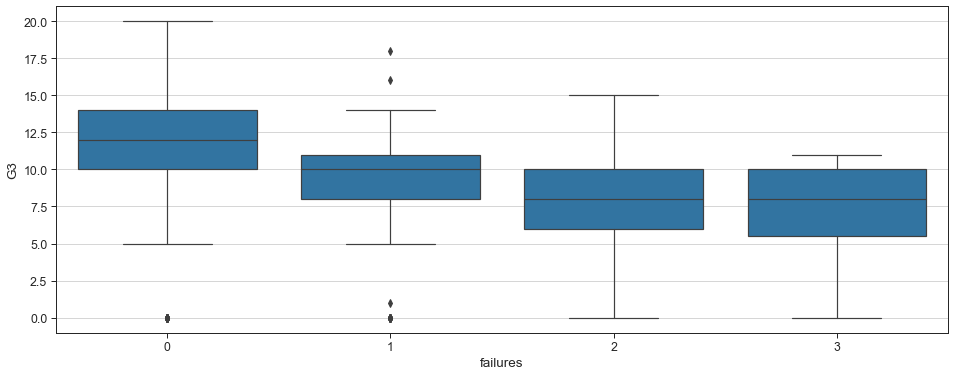

In [160]:
sns.boxplot(data=df, x='failures', y='G3', color="#1f77b4")

Oczywista zależność, im więcej poprawek, tym gorsze oceny.

#### Zależność od głównego przdemiotu oraz chęci podjęcia wyższej edukacji

<AxesSubplot:xlabel='class', ylabel='G3'>

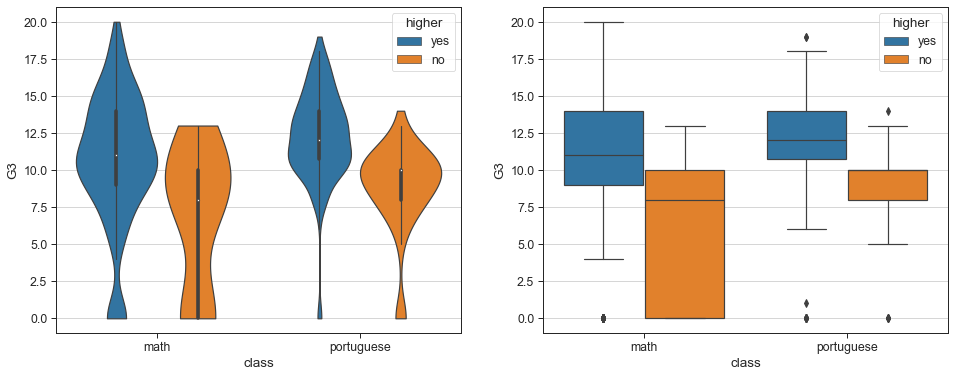

In [178]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
sns.violinplot(data=df, x='class', y='G3', hue='higher', ax=axs[0], cut=0)
sns.boxplot(data=df, x='class', y='G3', hue='higher', ax=axs[1])

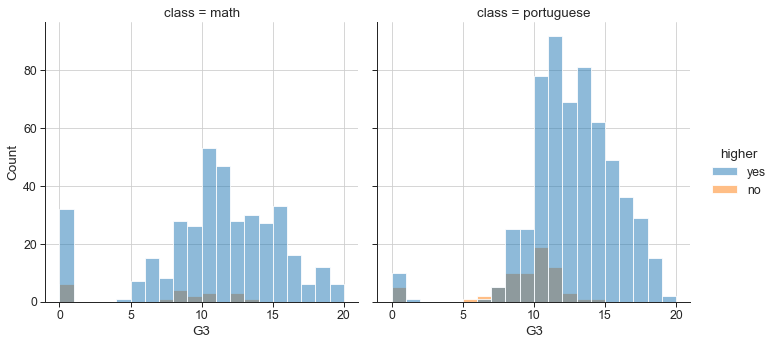

In [190]:
sns.displot(df, x='G3', hue='higher', binwidth=1, col='class');

Wnioski:
* jest więcej studentów klasy portugalskiej; jednak stosunkowo więcej studentów klasy matematycznej myśli o edukacji wyższej
* rozkład ocen studentów klasy matematycznej zdecydowanie bardziej spłaszczony; dużo osób osiąga zarówno słabsze, jak i lepsze wyniki
* studenci klasy portugalskiej skupiają sie głównie na przedziale 10-15 punktów

### Podsumowanie
Nie istnieje jeden główny czynnik, który by miał bardzo mocny wpływ na oceny studenta. Nie ważne, jak podzielimy grupę, znajdą sie jednostki o bardzo dobrej lub złej ocenie końcowej. 

Jednak, jeśli mielibyśmy obstawiać, to dobrą ocenę końcową otrzyma student:
* którego rodzice mają wyższe wykształcenie
* który poświęca dużo czasu na naukę
* który nie powtarzał klas
* który planuje wyższą edukację
* który uczy się raczej portugalskiego